In [1]:
from keras.datasets import imdb

2024-01-12 17:50:10.783370: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-12 17:50:11.106431: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-12 17:50:11.106525: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-12 17:50:11.110555: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-12 17:50:11.138473: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-12 17:50:11.138963: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [3]:
(train_data, train_labels), (test_data, test_labels)=imdb.load_data(num_words=10000) 

In [4]:
#Print an example of data and its label 
print(train_data[5]) 
print(train_labels[5]) 

[1, 778, 128, 74, 12, 630, 163, 15, 4, 1766, 7982, 1051, 2, 32, 85, 156, 45, 40, 148, 139, 121, 664, 665, 10, 10, 1361, 173, 4, 749, 2, 16, 3804, 8, 4, 226, 65, 12, 43, 127, 24, 2, 10, 10]
0


In [5]:
#Print max value of index words 
max([max(sequence) for sequence in train_data]) 

9999

In [6]:
#Decoding an example of data (converting to original words) 
word_index = imdb.get_word_index() 
reverse_word_index  = dict([(value,key) for (key, value) in word_index.items()]) 
decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[17]]) 

In [7]:
#Decode the sample number 17 
print(decoded_review) 

? at the height of the ? big ? racism row in 2007 involving ? ? and the late ? ? i condemned on an internet forum those ? b b ' fans who praised the show after years of bashing ? ? sitcoms such as ? ? ? ? ? i thought they were being ? and said so ? ain't half hot ? was then thrown into the argument with some pointing out it had starred an english actor ? up well yes but michael bates had lived in india as a boy and spoke ? ? the show's ? overlook the reality he brought to his performance as ? ? ? the noted indian character actor ? ? said in a 1995 documentary ? ? the ? that he was upset when he heard bates had landed the role but added no indian actor could have played that role as well as bates indeed br br ? was perry and ? companion show to ? ? also set in wartime the ? english town of ? on sea had been replaced by the hot steamy ? of india in particularly a place called ? where an army concert party puts on shows for the troops among them ? ? george ? his first sitcom role since ? 

In [8]:
#One hot encoding 
import numpy as np

In [9]:
def vectorize_sequences(sequences, dimension=10000): 
  results = np.zeros((len(sequences), dimension)) 
  for i, sequence in enumerate(sequences): 
    results[i, sequence] = 1. 
    return results 
x_train = vectorize_sequences(train_data) 
x_test = vectorize_sequences(test_data)

In [10]:
#Print an example of one hot encoded sample 
print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [11]:
#Vectorizing labels 
y_train = np.asarray(train_labels).astype('float32') 
y_test = np.asarray(test_labels).astype('float32') 

In [12]:
from keras import models 
from keras import layers

In [13]:
model = models.Sequential() 
model.add(layers. Dense (16, activation='relu', input_shape=(10000,))) 
model.add(layers.Dense (16, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid')) 

In [14]:
model.compile(optimizer='rmsprop', 
loss='binary_crossentropy', 
metrics=['accuracy']) 

In [15]:
x_val = x_train[:10000] 
partial_x_train = x_train[10000:] 
y_val = y_train[:10000] 
partial_y_train = y_train [10000:] 
history = model.fit(partial_x_train, 
partial_y_train, 
epochs=20, 
batch_size=512, 
validation_data=(x_val, y_val)) 

Epoch 1/20


2024-01-12 17:51:20.422670: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 600000000 exceeds 10% of free system memory.


30/30 [==============================] - 2s 41ms/step - loss: 0.6932 - accuracy: 0.4983 - val_loss: 0.6932 - val_accuracy: 0.4947
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4947
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4947
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4947
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4947
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4947
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6933 - val_accuracy: 0.4947
Epoch 8/20
30/30 [======

In [16]:
#Consulting the history 
history_dict = history.history 
print( history_dict.keys()) 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [17]:
#Plotting the loss 
import matplotlib.pyplot as plt

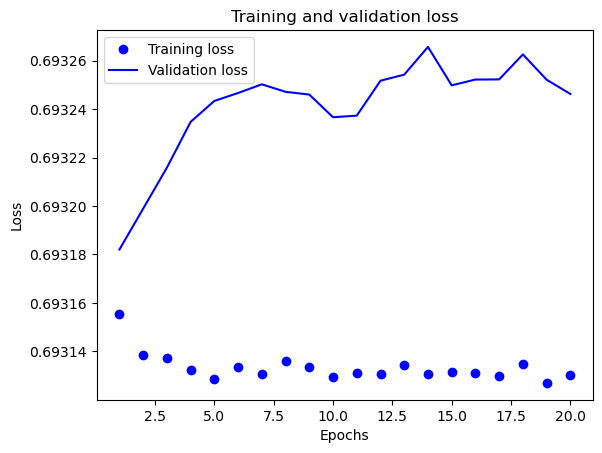

In [18]:
history_dict = history.history 
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss'] 
epochs = range(1, 20 + 1) 
plt.plot(epochs, loss_values, 'bo', label='Training loss') 
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend() 
plt.show() 

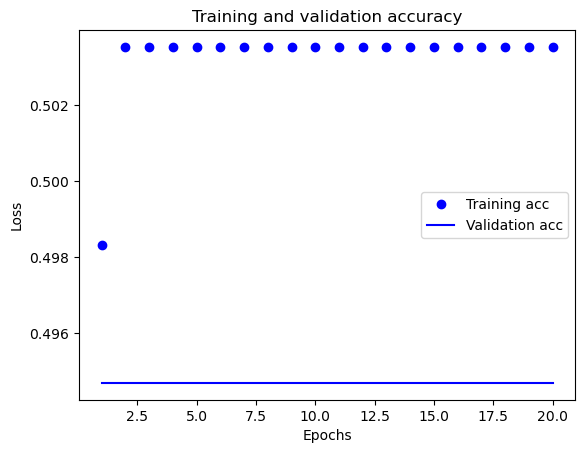

In [19]:
plt.clf() 
acc_values = history_dict['accuracy'] 
val_acc_values = history_dict['val_accuracy'] 
plt.plot(epochs, acc_values, 'bo', label='Training acc') 
plt.plot(epochs, val_acc_values, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend() 
plt.show() 

In [3]:
model = models.Sequential() 
model.add(layers.Dense (16, activation='relu', input_shape=(10000,))) 
model.add(layers. Dense (16, activation='relu')) 
model.add(layers. Dense (1, activation='sigmoid')) 
model.compile(optimizer='rmsprop', 
loss='binary_crossentropy', 
metrics=['accuracy']) 
model.fit(x_train, y_train, epochs=4, batch_size=512) 
results = model.evaluate(x_test, y_test) 

NameError: name 'x_train' is not defined

In [ ]:
print(results)

In [ ]:
model.predict(x_test) 